,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,Calgary Comm Standards,INACTIVE - EC - UTILITY YARD - CM,0020004409284,3030 68 ST SE,Electricity,2014,Jan,63,kWh
1,Calgary Comm Standards,INACTIVE - EC - UTILITY YARD - CM,0020004409284,3030 68 ST SE,Electricity,2014,Feb,73,kWh
2,Calgary Comm Standards,INACTIVE - EC - UTILITY YARD - CM,0020004409284,3030 68 ST SE,Electricity,2014,Mar,68,kWh
3,Calgary Comm Standards,INACTIVE - EC - UTILITY YARD - CM,0020004409284,3030 68 ST SE,Electricity,2014,Apr,51,kWh
4,Calgary Comm Standards,INACTIVE - EC - UTILITY YARD - CM,0020004409284,3030 68 ST SE,Electricity,2014,May,34,kWh
...,...,...,...,...,...,...,...,...,...
161303,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Mar,36,GJ
161304,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Apr,25,GJ
161305,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,May,18,GJ
161306,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Jun,0,GJ


Total Consumption
Energy Description Year                   
District Energy    2014       6.157700e+04
                   2015       4.993300e+04
                   2016       5.167700e+04
                   2017       5.820500e+04
                   2018       6.288500e+04
                   2019       6.747100e+04
                   2020       4.605900e+04
                   2021       3.476000e+04
Electricity        2014       1.744880e+06
                   2015       1.701642e+06
                   2016       1.652779e+06
                   2017       1.638944e+06
                   2018       1.682186e+06
                   2019       1.645133e+06
                   2020       1.528055e+06
                   2021       8.707714e+05
Natural Gas        2014       1.838556e+06
                   2015       1.662432e+06
                   2016       1.641438e+06
                   2017       1.778015e+06
                   2018       1.936503e+06
                   2019       1.984580e+06
                   2020       1.879193e+06
                   2021       1.116475e+06
Solar Power        2014       1.211508e+02
                   2015       3.415248e+02
                   2016       8.181540e+02
                   2017       4.082753e+03
                   2018       1.003284e+04
                   2019       1.140763e+04
                   2020       2.050567e+04
                   2021       1.093788e+04
Solar Thermal      2014       1.938000e+03
                   2015       1.796000e+03
                   2016       9.250000e+02
                   2017       1.012000e+03
                   2018       8.520000e+02
                   2019       3.590000e+02

<Figure size 1080x432 with 0 Axes>

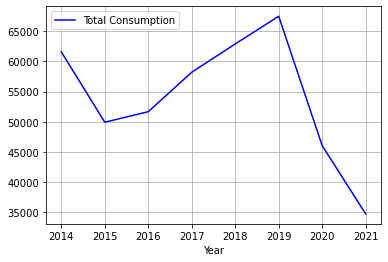

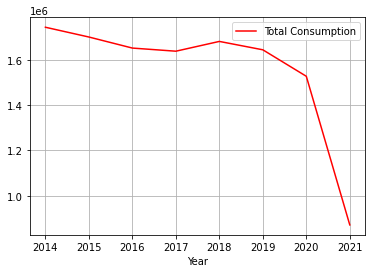

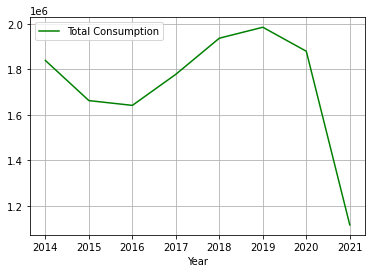

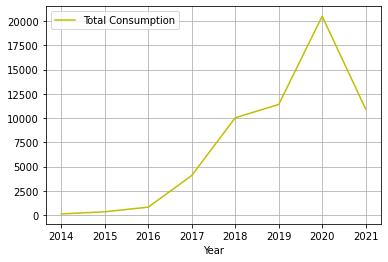

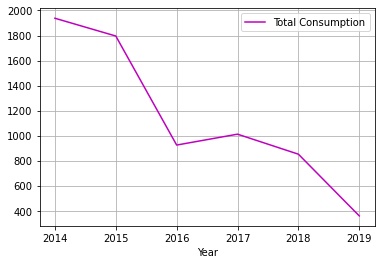

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

energydata = pd.read_csv("Corporate_Energy_Consumption.csv", thousands=',')

display(energydata)

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        return x
    else:
        return x
    

energydata = energydata.apply(lambda x: func(x), axis=1)
newData = energydata.groupby(['Energy Description', 'Year']).sum()
display(newData)


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']

fig = plt.figure()
fig.set_size_inches(15,6)

disEnergyData.plot(kind='line', color='b', grid=True)
electricityData.plot(kind='line', color='r', grid=True)
ngData.plot(kind='line', color='g', grid=True)
seData.plot(kind='line', color='y', grid=True)
stData.plot(kind='line', color='m', grid=True)

plt.show()